# <b>1 <span style='color:#9146ff'>|</span> Import Libraries</b> 

In [62]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)



# Progress tracking
from tqdm.auto import tqdm

# Data profiling
from ydata_profiling import profile_report

# Dimensionality reduction
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Data preprocessing and modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve, auc , roc_auc_score
from sklearn.preprocessing import MinMaxScaler



# Neural network libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.optim import Adam

# Setting up plotting to be displayed inline
# %matplotlib inline

# Initialize label encoder, standard scaler, and one-hot encoder
lb = LabelEncoder()
sc = StandardScaler()
onehot = OneHotEncoder()


# <b>2 <span style='color:#9146ff'>|</span> Dataset Info</b> 

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/noisy-Customer-Churn.csv")  
df.head() 

Unnamed: 0.1  Unnamed: 0  customerID  gender  SeniorCitizen Partner  \
0             0           0  7590-VHVEG  Female              0     Yes   
1             1           1  5575-GNVDE    Male              0      No   
2             2           2  3668-QPYBK    Male              0      No   
3             3           3  7795-CFOCW    Male              0      No   
4             4           4  9237-HQITU  Female              0      No   

  Dependents  tenure PhoneService     MultipleLines  ... DeviceProtection  \
0         No       1           No  No phone service  ...               No   
1         No      34          Yes                No  ...              Yes   
2         No       2          Yes                No  ...               No   
3         No      45           No  No phone service  ...              Yes   
4         No       2          Yes                No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check          29.85        29.85    No  
1               Mailed check          56.95       1889.5    No  
2               Mailed check          53.85       108.15   Yes  
3  Bank transfer (automatic)          42.30      1840.75    No  
4           Electronic check          70.70       151.65   Yes  

[5 rows x 23 columns]

In [3]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [4]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10043 non-null  object 
 1   gender            10043 non-null  object 
 2   SeniorCitizen     10043 non-null  int64  
 3   Partner           10043 non-null  object 
 4   Dependents        10043 non-null  object 
 5   tenure            10043 non-null  int64  
 6   PhoneService      10043 non-null  object 
 7   MultipleLines     10043 non-null  object 
 8   InternetService   10043 non-null  object 
 9   OnlineSecurity    10043 non-null  object 
 10  OnlineBackup      10043 non-null  object 
 11  DeviceProtection  10043 non-null  object 
 12  TechSupport       10043 non-null  object 
 13  StreamingTV       10043 non-null  object 
 14  StreamingMovies   10043 non-null  object 
 15  Contract          10043 non-null  object 
 16  PaperlessBilling  10043 non-null  object

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# <b>3 <span style='color:#9146ff'>|</span>Data Cleaning </b> 

In [7]:
df.drop(['customerID'],axis='columns',inplace=True)
df.shape  

(10043, 20)

In [8]:
df.isnull().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod       40
MonthlyCharges      15
TotalCharges        39
Churn                0
dtype: int64

In [9]:
#missing values 
df = df[df.TotalCharges!=' ']  

In [10]:
#Dealing with nulls 
mean_value = df['MonthlyCharges'].mean()
df['MonthlyCharges'].fillna(mean_value, inplace=True) 

In [11]:
# Convert 'TotalCharges' column to numeric, coercing errors to NaN 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Calculate the mean excluding NaN values
mean_value = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_value, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(int) 


In [12]:
# Calculate the mode of the column
mode_value = df['PaymentMethod'].mode()[0]
# Replace missing values with the mode 
df['PaymentMethod'].fillna(mode_value, inplace=True)   

In [13]:
#check nulls after cleaning 
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# Check for duplicated rows
duplicate_rows = df[df.duplicated()]

# Print the duplicated rows
print("Duplicated Rows:")
print(duplicate_rows)

Duplicated Rows:
       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
964      Male              0      No         No       1          Yes   
1338     Male              0      No         No       1          Yes   
1491   Female              0      No         No       1          Yes   
1739     Male              0      No         No       1          Yes   
1932     Male              0      No         No       1          Yes   
...       ...            ...     ...        ...     ...          ...   
10038  Female              0      No         No       7          Yes   
10039  Female              0      No         No      47          Yes   
10040    Male              1      No         No       2          Yes   
10041    Male              1      No         No      62          Yes   
10042  Female              0     Yes        Yes      16          Yes   

      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
964              No             DSL  

In [15]:
#Drop The Duplicates 
df=df.drop_duplicates()

In [16]:
# Check for duplicated rows
duplicate_rows = df[df.duplicated()]

# Print the duplicated rows
print("Duplicated Rows:")
print(duplicate_rows)  

Duplicated Rows:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [17]:
numerical_features=[]
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        print(f"{col} is a numerical column.")
        numerical_features.append(col)

SeniorCitizen is a numerical column.
tenure is a numerical column.
MonthlyCharges is a numerical column.
TotalCharges is a numerical column.


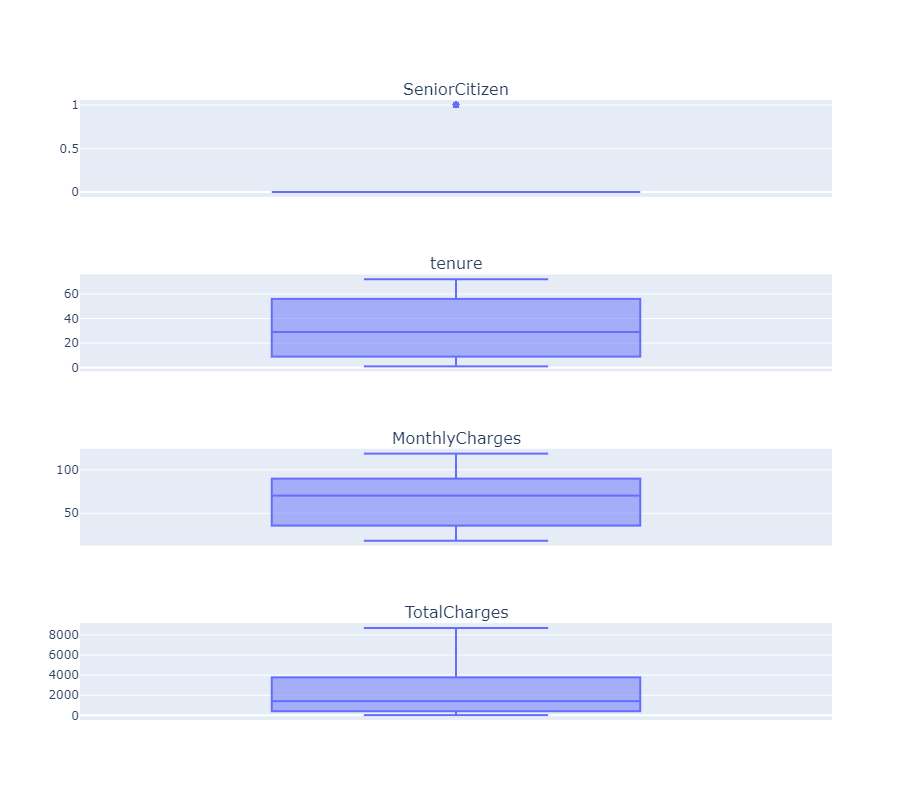

In [18]:
#Detect the outliers 
fig = make_subplots(rows=len(numerical_features), cols=1, subplot_titles=numerical_features)

for i, feature in enumerate(numerical_features):
    boxplot = px.box(df, y=feature, title=f'Boxplot of {feature}')
    # Add boxplot to subplots
    for data in boxplot.data:
        fig.add_trace(data, row=i+1, col=1)

fig.update_layout(height=200*len(numerical_features), showlegend=False)

fig.show() 

In [19]:
#Dealing With outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df >= lower_bound) & (df <= upper_bound)]  

In [20]:
df[numerical_features] = remove_outliers(df[numerical_features]) 

In [21]:
df.TotalCharges = pd.to_numeric(df.TotalCharges) 
df.TotalCharges.values 

array([  29, 1889,  108, ..., 2295, 2295, 2295])

In [22]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True) 

In [23]:
# Categorical features 
cat_cols = df.select_dtypes(include=['object', 'category']).columns 
print(cat_cols)
print(len(cat_cols)) 

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
16


In [24]:
binary_features=[]
for col in df.columns:
    unique_vals = df[col].nunique()
    if unique_vals == 2:
        print(f"{col}  : has only {unique_vals} unique values and is likely a binary feature.")
        binary_features.append(col)  

gender  : has only 2 unique values and is likely a binary feature.
Partner  : has only 2 unique values and is likely a binary feature.
Dependents  : has only 2 unique values and is likely a binary feature.
PhoneService  : has only 2 unique values and is likely a binary feature.
MultipleLines  : has only 2 unique values and is likely a binary feature.
OnlineSecurity  : has only 2 unique values and is likely a binary feature.
OnlineBackup  : has only 2 unique values and is likely a binary feature.
DeviceProtection  : has only 2 unique values and is likely a binary feature.
TechSupport  : has only 2 unique values and is likely a binary feature.
StreamingTV  : has only 2 unique values and is likely a binary feature.
StreamingMovies  : has only 2 unique values and is likely a binary feature.
PaperlessBilling  : has only 2 unique values and is likely a binary feature.
Churn  : has only 2 unique values and is likely a binary feature.


In [25]:
categorical_features=[]
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        if not np.issubdtype(df[col].dtype, np.number):
            unique_vals = df[col].nunique()
            if unique_vals > 2:
                print(f"{col} is a non-numeric categorical column with {unique_vals} categories.")
                categorical_features.append(col)

InternetService is a non-numeric categorical column with 3 categories.
Contract is a non-numeric categorical column with 3 categories.
PaymentMethod is a non-numeric categorical column with 4 categories.


In [26]:
categorical_features

['InternetService', 'Contract', 'PaymentMethod']

In [27]:
for i in categorical_features : 
    print(f"{df[i].value_counts()}\n\n")

InternetService
Fiber optic    3116
DSL            2439
No             1531
Name: count, dtype: int64


Contract
Month-to-month    3897
Two year          1703
One year          1486
Name: count, dtype: int64


PaymentMethod
Electronic check             2399
Mailed check                 1603
Bank transfer (automatic)    1550
Credit card (automatic)      1534
Name: count, dtype: int64




In [28]:
numerical_features=[]
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        print(f"{col} is a numerical column.")
        numerical_features.append(col)

SeniorCitizen is a numerical column.
tenure is a numerical column.
MonthlyCharges is a numerical column.
TotalCharges is a numerical column.


In [29]:
numerical_features.remove('SeniorCitizen')
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

# <b>4 <span style='color:#9146ff'>|</span>Dataset Profiling </b> 

In [30]:
# Brief about a our dataset
profile=profile_report.ProfileReport(df,title='Customer Churn Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# <b>5 <span style='color:#9146ff'>|</span> EDA</b> 

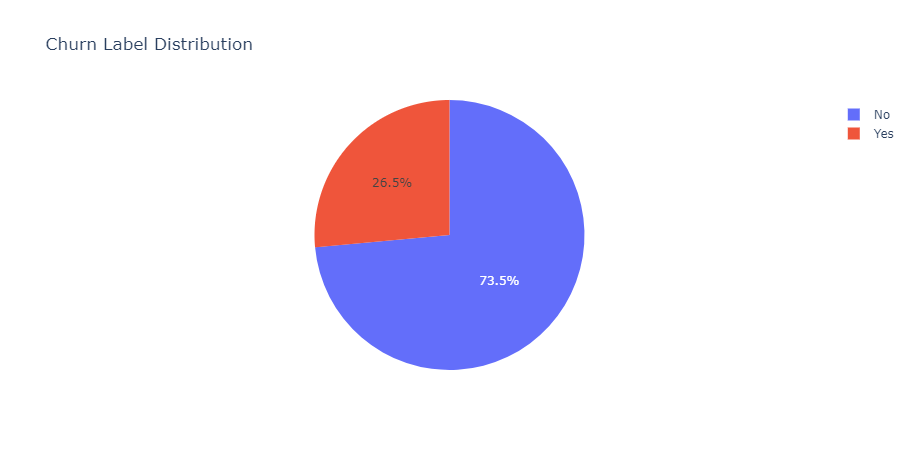

In [31]:
Churn_Label_counts= df['Churn'].value_counts()
fig2 = px.pie(names= Churn_Label_counts.keys(), values= Churn_Label_counts.values, title='Churn Label Distribution')
fig2.show()  

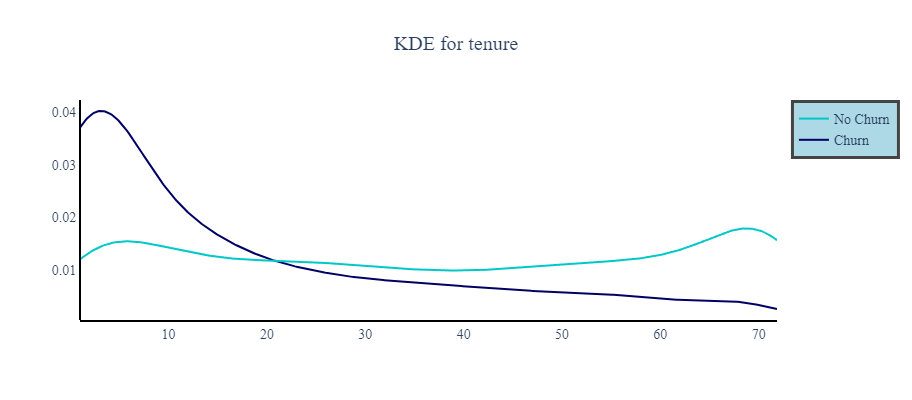

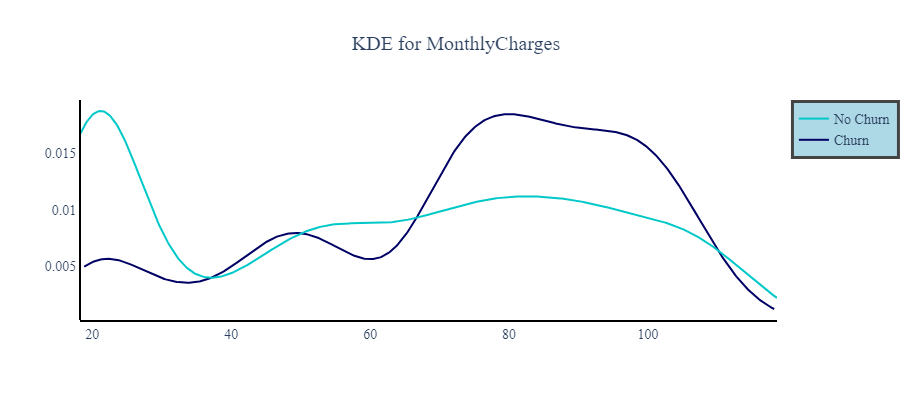

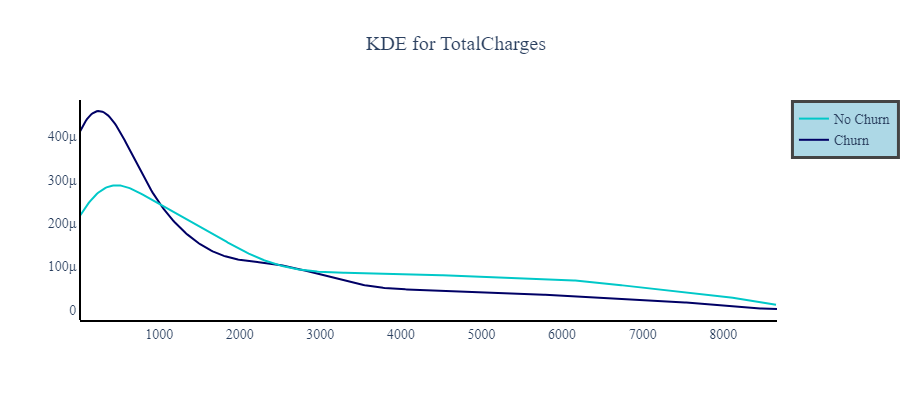

In [32]:
def kde_plot(column_name, data_frame=df):
            
    """arguments: column_name:str type, 
                  dataframe:pandas Data Frame
       returns: kde plot object"""
    
    #  in case when type is not str
    if type(column_name) != str:
        raise ValueError(f'Expected str type, got: {type(column_name)}')
    
    #  in case when type is correct but colum is not in data frame
    if column_name not in data_frame.columns:
        raise ValueError('column not in DataFrame!')
    
    churn = data_frame[data_frame['Churn'] == 'Yes']
    no_churn = data_frame[data_frame['Churn'] == 'No']

    fig  = ff.create_distplot([churn[column_name], no_churn[column_name]], group_labels = ['Churn', 'No Churn'],
                              bin_size = 7, show_hist=False, show_rug=False, 
                              colors=['rgb(0, 0, 101)','rgb(0,200,200)' ])
    fig.update_layout(width=800, height=400,
                     title=dict(text=f'KDE for {column_name}', x=0.5),
                     font=dict(family='Times New Roman', size=14),
                     legend=dict(bgcolor='lightblue', borderwidth=3),
                      plot_bgcolor='white'
                     )
    fig.update_xaxes(showgrid=False, showline=True, linewidth=2, linecolor='black')
    fig.update_yaxes(showgrid=False, showline=True, linewidth=2, linecolor='black')
    fig.show()

    
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in columns_to_plot:
    kde_plot(column)

### Conclusions:

1. Recent clients are more likely to churn.
2. Clients who initially paid less but started paying more monthly are more likely to churn.
3. Clients with higher total charges are more likely to churn.
4. MonthlyCharges is an important feature.


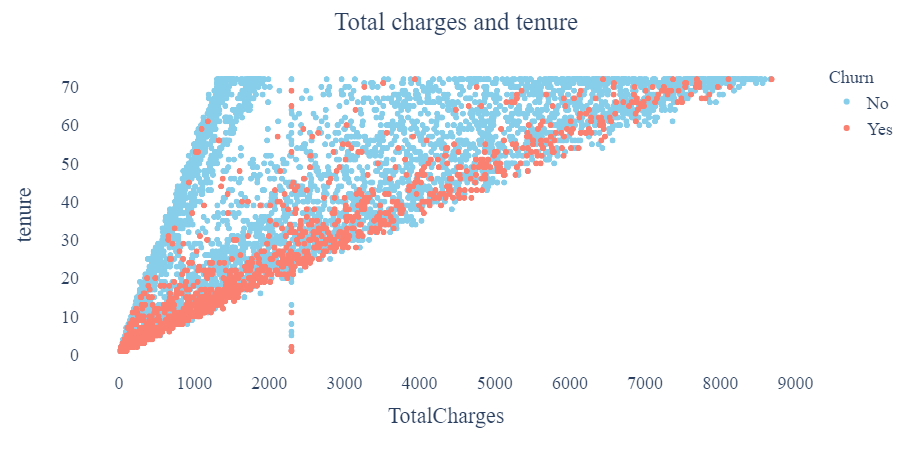

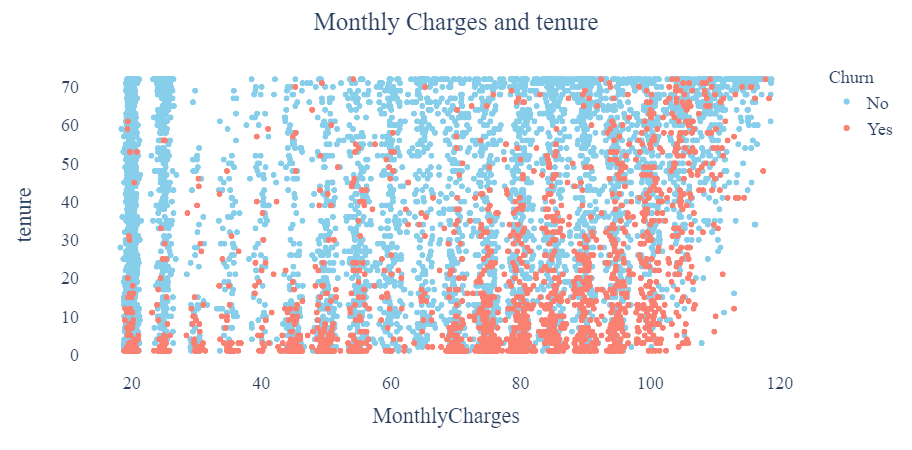

In [33]:
fig = px.scatter(df, x='TotalCharges', y='tenure', color='Churn',
          width=600, height=450, color_discrete_sequence=['skyblue', 'salmon'])

fig.update_layout(title=dict(text='Total charges and tenure', x=0.5),
                            font=dict(family='Times New Roman', size=18),
                 plot_bgcolor='white')

fig.show()

fig = px.scatter(df, x='MonthlyCharges', y='tenure', color='Churn',
          width=600, height=450,color_discrete_sequence=['skyblue', 'salmon'])

fig.update_layout(title=dict(text='Monthly Charges and tenure', x=0.5),
                            font=dict(family='Times New Roman', size=18),
                 plot_bgcolor='white')

fig.show()

In [34]:
map_table = {1: 'Yes',
            0: 'No'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(map_table) 

In [35]:
def percentage_barplot(column_name:str, data_frame=df, churn_column='Churn', orientation='v'):
    #  in case when type is not str
    if not all(isinstance(arg, str) for arg in [column_name, churn_column, orientation]):
        raise ValueError(f'Expected str type for arguments.')

    #  in case when column is not in DataFrame
    if column_name not in data_frame.columns or churn_column not in data_frame.columns:
        raise ValueError('Column not in DataFrame!')
        
    group_by_churn_and_column_name = data_frame.groupby([column_name, churn_column]).size().reset_index(name='count')
    group_by_churn_and_column_name['percentage'] = group_by_churn_and_column_name.groupby(column_name)['count'].transform(lambda x: x / x.sum() * 100)

    #  if orientation is not v or h
    if orientation not in ['v', 'h']:
        raise ValueError('Choose vertical: v or horizontal: h orientation!')

    if orientation == 'v': 
        fig = px.bar(group_by_churn_and_column_name, x=column_name, y='percentage',
            color=churn_column, color_discrete_sequence=['skyblue', 'salmon'], barmode='group')
        fig.update_layout(yaxis=dict(ticksuffix='%'))
    else:
        fig = px.bar(group_by_churn_and_column_name, y=column_name, x='percentage',
            color=churn_column, color_discrete_sequence=['skyblue', 'salmon'], barmode='group')
        fig.update_layout(xaxis=dict(ticksuffix='%'))
    
    fig.update_layout(width=500, height=600, font=dict(family='Times New Roman', size=14),
                 title=dict(font=dict(size=22), text=f'{column_name}', x=0.5), 
                 plot_bgcolor='white', 
                 legend=dict(bgcolor='white', borderwidth=3, title='Churn:'))

    fig.show() 


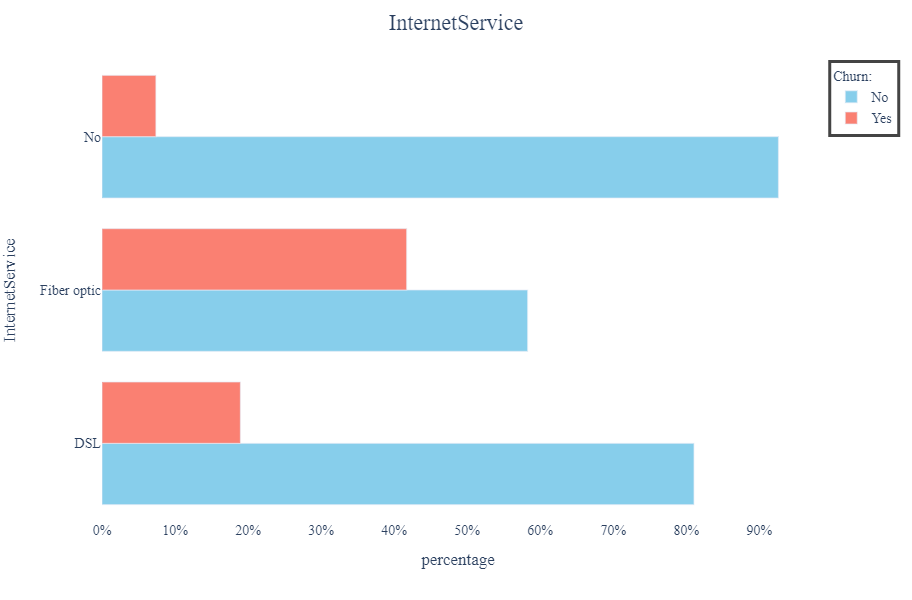

In [36]:
percentage_barplot('InternetService',orientation='h')


### Conclusions:

- The highest churn rate is observed among customers with fiber optic internet service, which is likely due to its popularity and speed.
- Customers with DSL subscriptions are less likely to churn compared to fiber optic users.
- The lowest churn rate is observed among customers with no internet service.


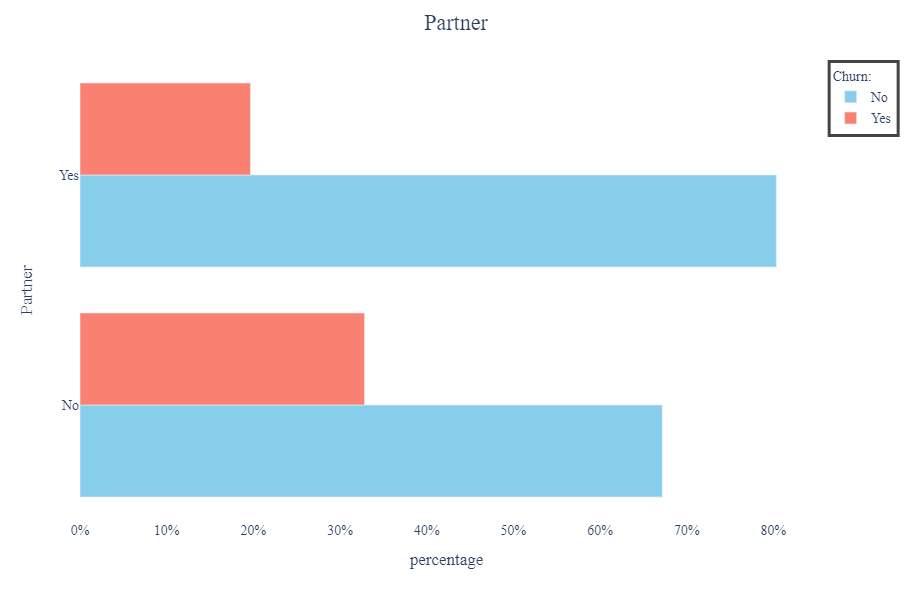

In [37]:
percentage_barplot('Partner', orientation='h')


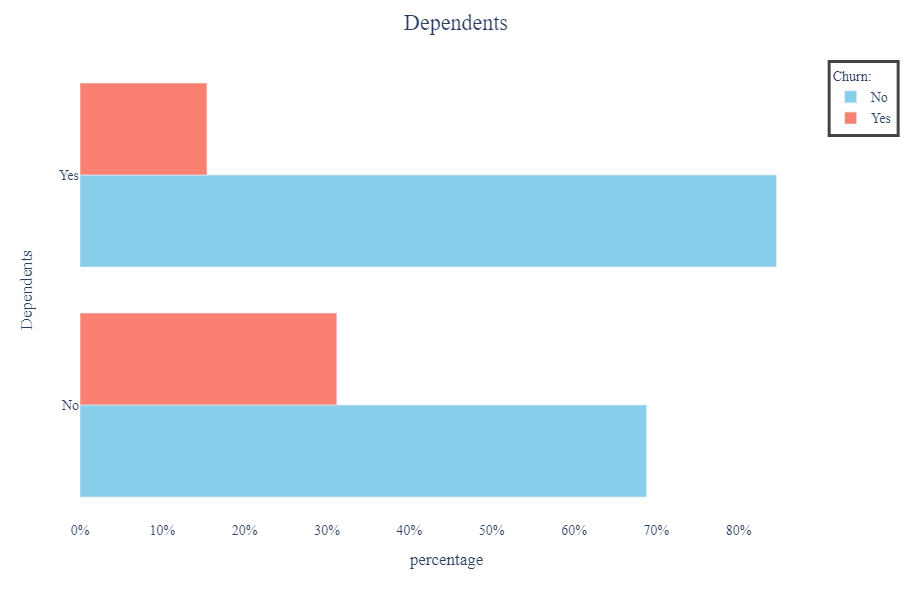

In [38]:
percentage_barplot('Dependents', orientation='h')
 

- customers which have no partner are more likely to churn
- customers without dependents are more likely to churn

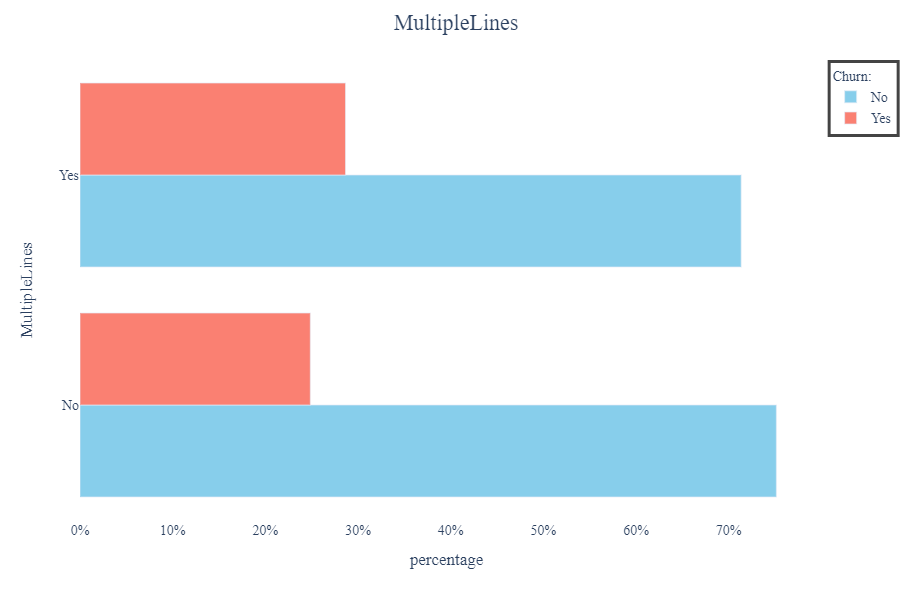

In [39]:
percentage_barplot('MultipleLines', orientation='h')


## Conclusions:

- plot above shows that clients with multiple lines has almost the same churn rate as clients which don't have it
- few customers don't have phone services

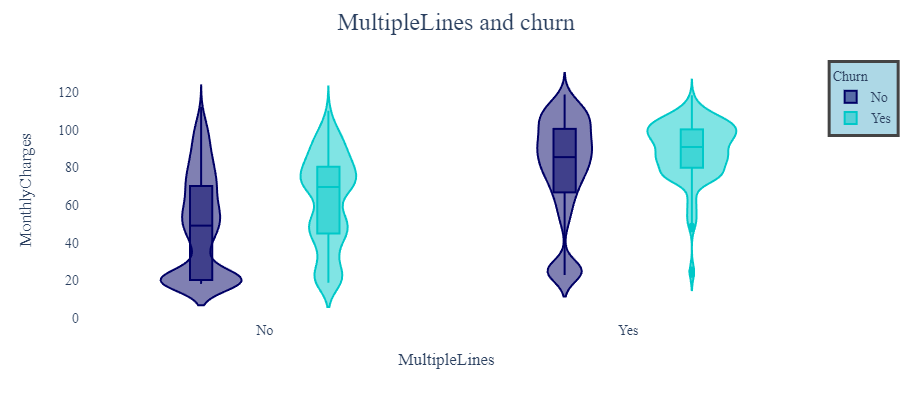

In [41]:
fig = px.violin(df, x='MultipleLines', y='MonthlyCharges', color='Churn',
         color_discrete_sequence=['rgb(0, 0, 101)','rgb(0,200,200)'],box=True )
fig.update_layout(width=800, height=400,
                 title=dict(text= 'MultipleLines and churn',x=0.5, 
                           font=dict(size=24)),
                 font=dict(family='Times New Roman', size=14),
                 legend=dict(bgcolor='lightblue', borderwidth=3),
                 plot_bgcolor='white')

fig

the following conclusions can be drawn from the plots above:

- there's any pattern for no phone service users
- Users which have no multiple lines and their monthly charges are bigger than 60 dollars are more likely to churn
- Users with multiple lines and monthly charges greater than 60 dollars are very likely to churn

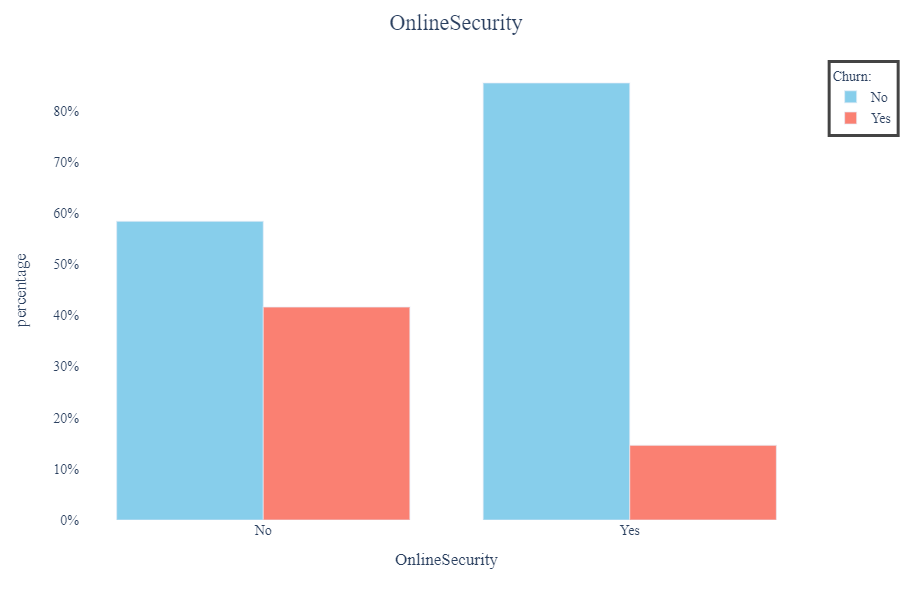

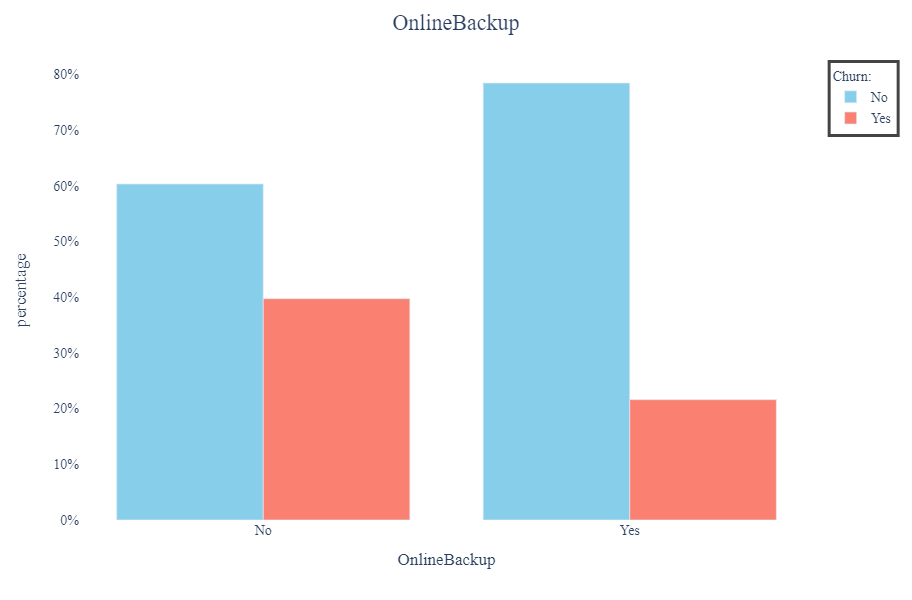

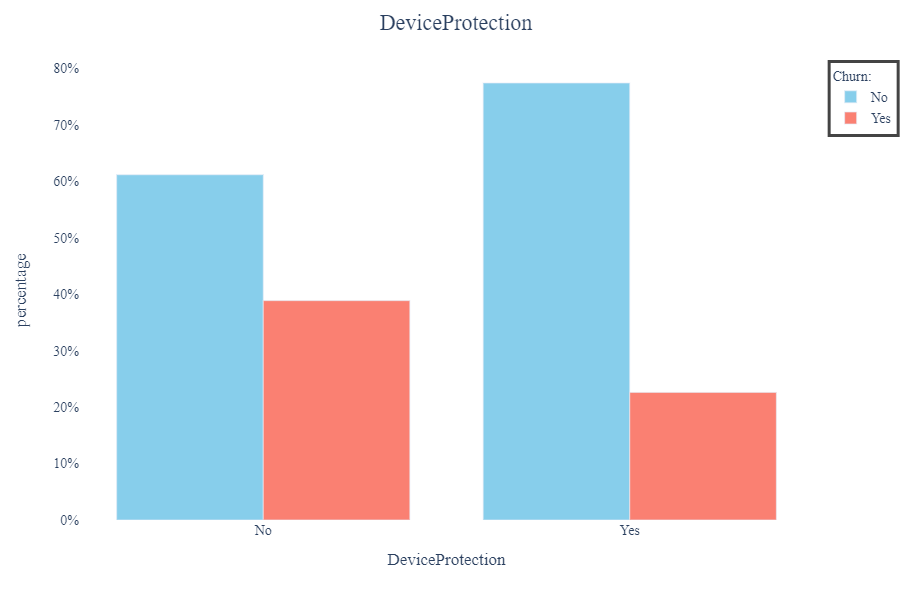

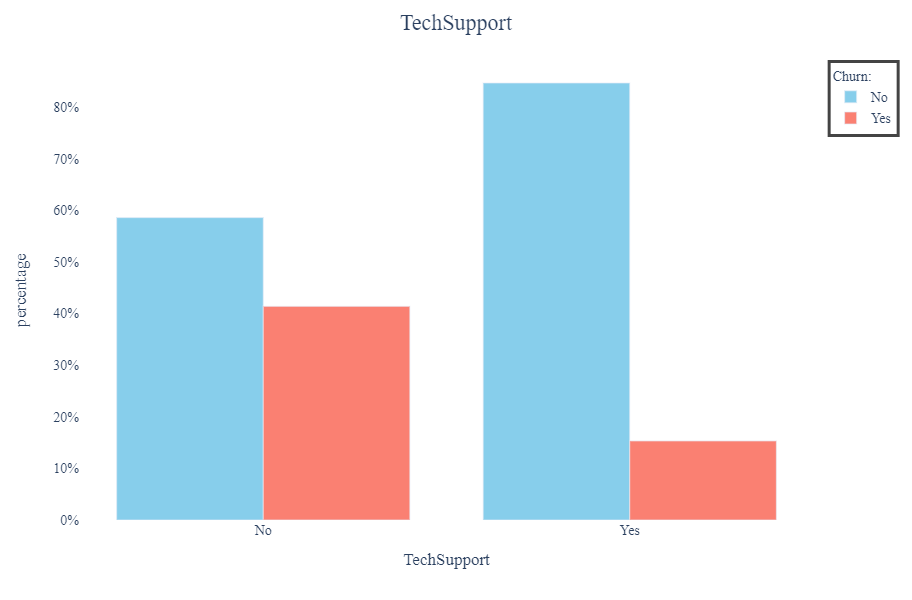

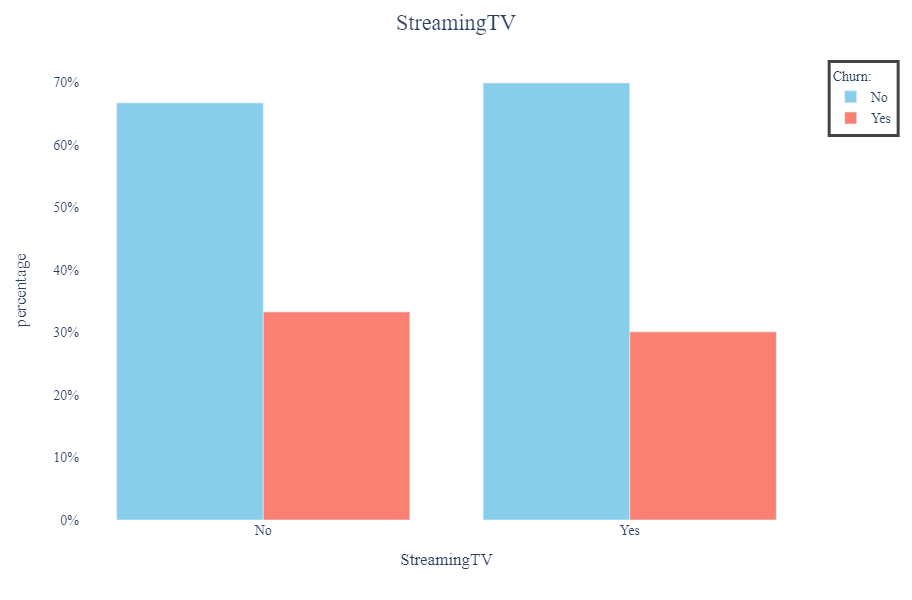

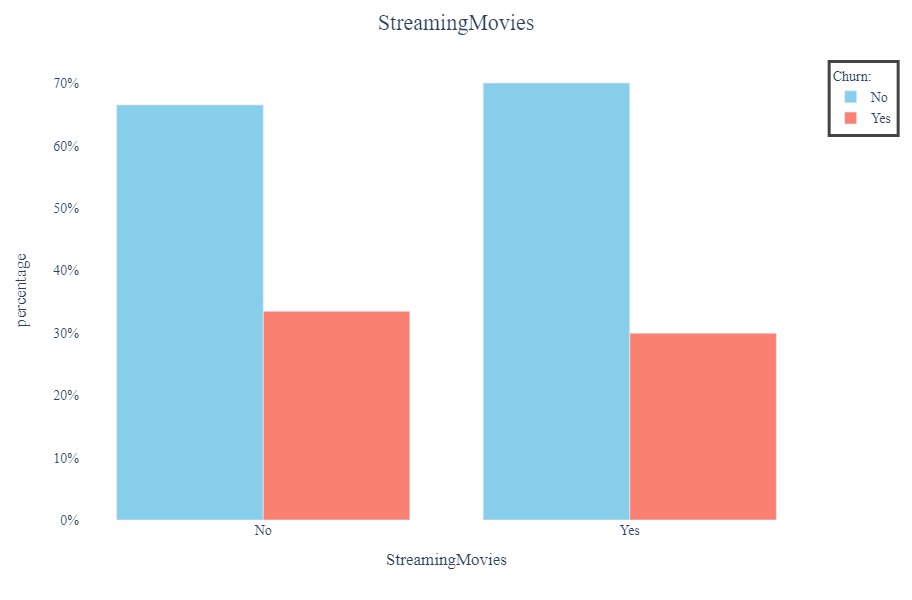

In [42]:
columns_to_plot = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies']
customers_with_internet = df[df['InternetService'] != 'No']
for column in columns_to_plot:
    percentage_barplot(column, data_frame=customers_with_internet) 

## Conclusions:

- customers without technical support are more likely to churn than customers which have this kind of support
- streaming services churn rates are not avalible to predic

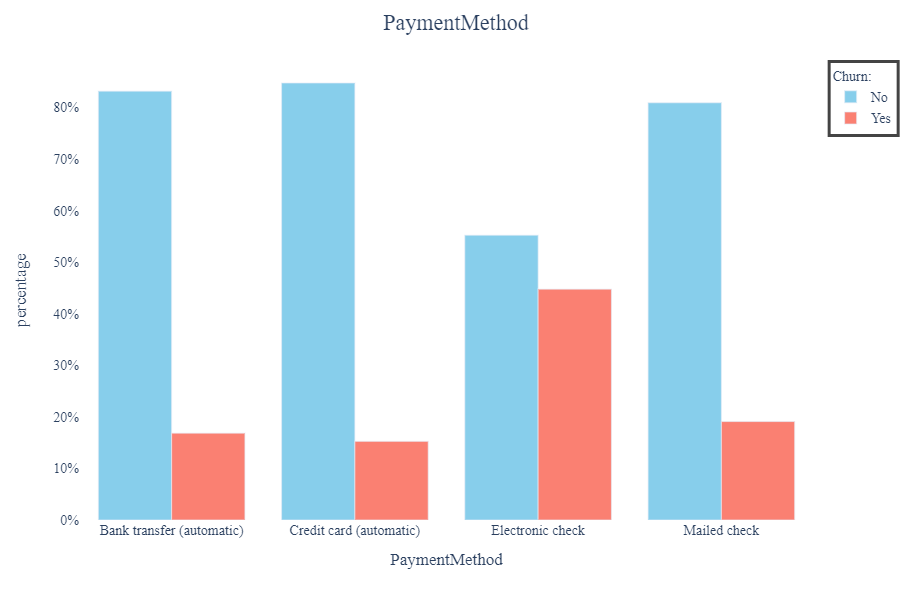

In [43]:
percentage_barplot('PaymentMethod')

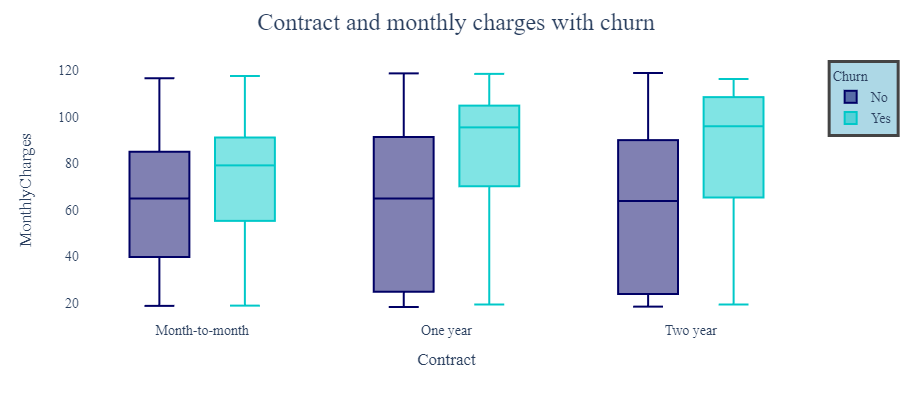

In [44]:
fig = px.box(df, x='Contract', y='MonthlyCharges', color='Churn',
         color_discrete_sequence=['rgb(0, 0, 101)','rgb(0,200,200)'] )
fig.update_layout(width=800, height=400,
                 title=dict(text= 'Contract and monthly charges with churn',x=0.5, 
                           font=dict(size=24)),
                 font=dict(family='Times New Roman', size=14),
                 legend=dict(bgcolor='lightblue', borderwidth=3),
                 plot_bgcolor='white')

fig

- Customers which decide to churn have in every case bigger monthly charges from customers which didn't decide to churn
- one year and two year payments are biger than in month-month contract

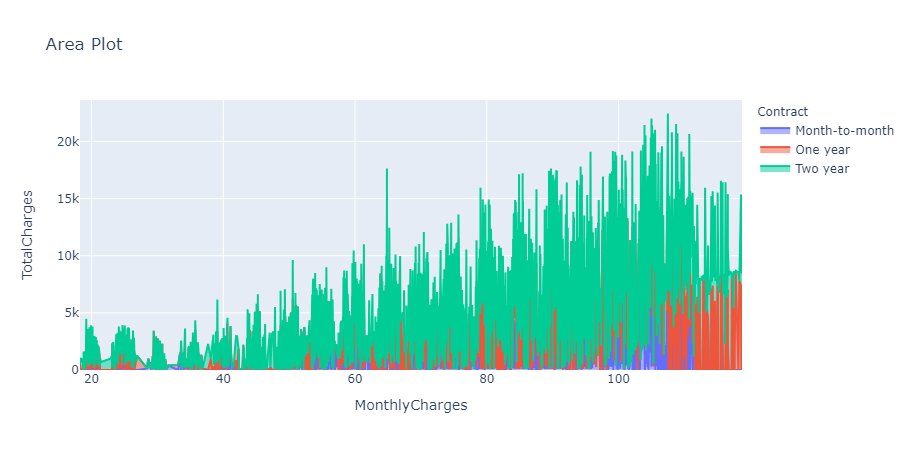

In [45]:
fig = px.area(df , x='MonthlyCharges', y='TotalCharges' , color="Contract" , title='Area Plot')
fig.show()

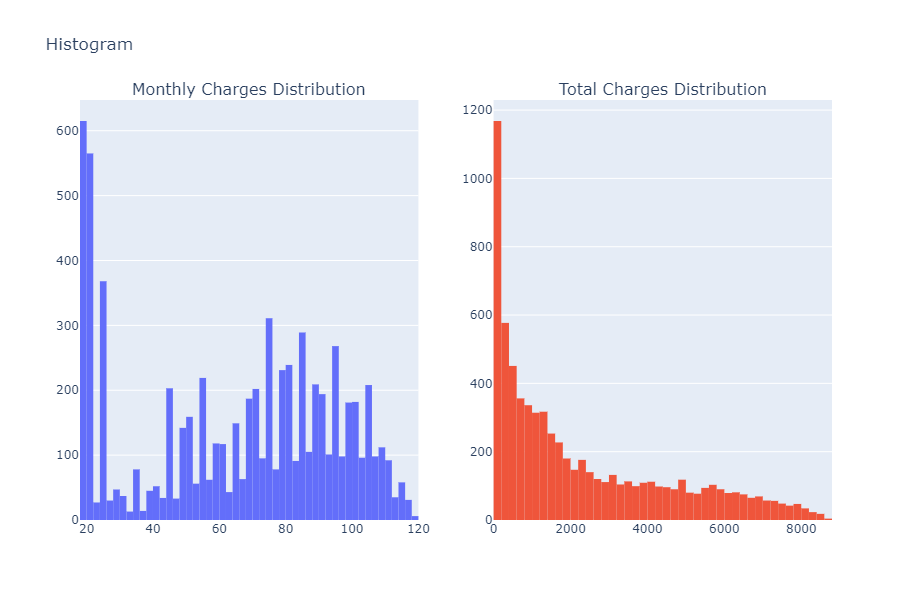

In [46]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Monthly Charges Distribution", "Total Charges Distribution"))

fig.add_trace(
    go.Histogram(x=df['MonthlyCharges'], name='MonthlyCharges'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['TotalCharges'], name='TotalCharges'),
    row=1, col=2
)

fig.update_layout(height=600, title_text="Histogram", showlegend=False)
fig.show()


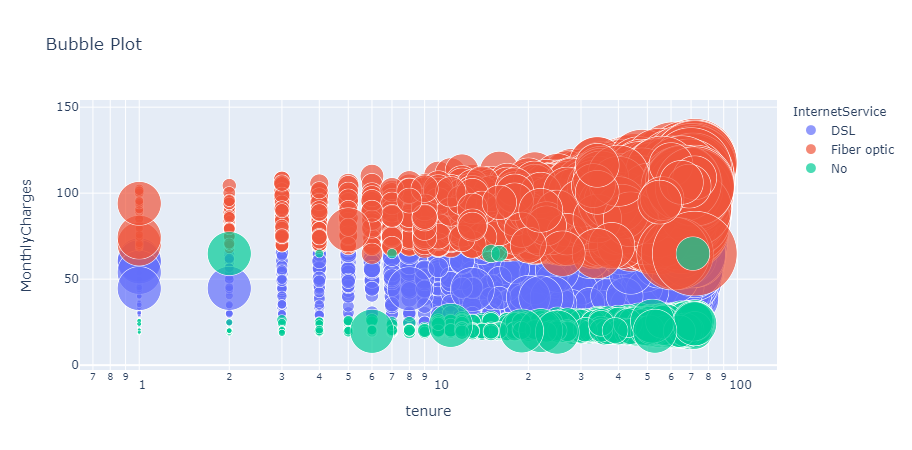

In [47]:
fig = px.scatter(df , x='tenure' , y = 'MonthlyCharges' , color = 'InternetService' , size = 'TotalCharges' , log_x = True , size_max = 60 , title='Bubble Plot')
fig.show()

# <b>6 <span style='color:#9146ff'>|</span> Data Prepartion For Models</b> 

In [48]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse=False)  
encoded_data = encoder.fit_transform(df[categorical_cols]) 

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)  

# Concatenate the original DataFrame with the encoded DataFrame 
df = pd.concat([df, encoded_df], axis=1)  

In [49]:
df

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0          1           29.85            29            1.0          0.0   
1         34           56.95          1889            0.0          1.0   
2          2           53.85           108            0.0          1.0   
3         45           42.30          1840            0.0          1.0   
4          2           70.70           151            1.0          0.0   
...      ...             ...           ...            ...          ...   
7081      20           39.40          2295            0.0          1.0   
7082      58           75.20          2295            0.0          1.0   
7083       2           44.65          2295            0.0          1.0   
7084      22           39.20          2295            1.0          0.0   
7085       1           44.55          2295            1.0          0.0   

      SeniorCitizen_No  SeniorCitizen_nan  Partner_No  Partner_Yes  \
0                  1.0                0.0         0.0          1.0   
1                  1.0                0.0         1.0          0.0   
2                  1.0                0.0         1.0          0.0   
3                  1.0                0.0         1.0          0.0   
4                  1.0                0.0         1.0          0.0   
...                ...                ...         ...          ...   
7081               1.0                0.0         0.0          1.0   
7082               1.0                0.0         0.0          1.0   
7083               1.0                0.0         1.0          0.0   
7084               1.0                0.0         0.0          1.0   
7085               1.0                0.0         1.0          0.0   

      Dependents_No  ...  Contract_One year  Contract_Two year  \
0               1.0  ...                0.0                0.0   
1               1.0  ...                1.0                0.0   
2               1.0  ...                0.0                0.0   
3               1.0  ...                1.0                0.0   
4               1.0  ...                0.0                0.0   
...             ...  ...                ...                ...   
7081            0.0  ...                0.0                1.0   
7082            0.0  ...                1.0                0.0   
7083            1.0  ...                0.0                0.0   
7084            0.0  ...                0.0                0.0   
7085            1.0  ...                0.0                0.0   

      PaperlessBilling_No  PaperlessBilling_Yes  \
0                     0.0                   1.0   
1                     1.0                   0.0   
2                     0.0                   1.0   
3                     1.0                   0.0   
4                     0.0                   1.0   
...                   ...                   ...   
7081                  0.0                   1.0   
7082                  0.0                   1.0   
7083                  1.0                   0.0   
7084                  1.0                   0.0   
7085                  0.0                   1.0   

      PaymentMethod_Bank transfer (automatic)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
7081                                      0.0   
7082                                      0.0   
7083                                      0.0   
7084                                      0.0   
7085                                      0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                       0.0                             1.0   
1                                       0.0                             0.0   
2                                       0.0 

In [50]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns

# Drop non-numeric columns
numeric_df = df.drop(columns=non_numeric_columns) 

# Compute correlation matrix
correlation_matrix = numeric_df.corr()  


In [51]:
corr_features=[]
for i in correlation_matrix.columns :
    for j in correlation_matrix.index :
        if correlation_matrix.loc[i,j] >= 0.55 or correlation_matrix.loc[i,j] <= -0.55 : 
            if correlation_matrix.loc[i,j] == 1 : 
                continue 
            else : 
                print(f"Column : {i}\t\t Row : {j}\t\t Correlation value : {correlation_matrix.loc[i,j]}")
                print("-"*200) 
                corr_features.append([i,j])
    

Column : tenure		 Row : TotalCharges		 Correlation value : 0.8229066360813132
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column : tenure		 Row : Contract_Month-to-month		 Correlation value : -0.6493431206306246
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column : tenure		 Row : Contract_Two year		 Correlation value : 0.5640795367889542
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column : MonthlyCharges		 Row : TotalCharges		 Correlation value : 0.6482726066456234
------------------------------------------------------------

In [52]:
corr_features

[['tenure', 'TotalCharges'],
 ['tenure', 'Contract_Month-to-month'],
 ['tenure', 'Contract_Two year'],
 ['MonthlyCharges', 'TotalCharges'],
 ['MonthlyCharges', 'InternetService_Fiber optic'],
 ['MonthlyCharges', 'InternetService_No'],
 ['MonthlyCharges', 'StreamingTV_No'],
 ['MonthlyCharges', 'StreamingTV_Yes'],
 ['MonthlyCharges', 'StreamingMovies_No'],
 ['MonthlyCharges', 'StreamingMovies_Yes'],
 ['TotalCharges', 'tenure'],
 ['TotalCharges', 'MonthlyCharges'],
 ['gender_Female', 'gender_Male'],
 ['gender_Male', 'gender_Female'],
 ['SeniorCitizen_No', 'SeniorCitizen_nan'],
 ['SeniorCitizen_nan', 'SeniorCitizen_No'],
 ['Partner_No', 'Partner_Yes'],
 ['Partner_Yes', 'Partner_No'],
 ['Dependents_No', 'Dependents_Yes'],
 ['Dependents_Yes', 'Dependents_No'],
 ['PhoneService_No', 'PhoneService_Yes'],
 ['PhoneService_Yes', 'PhoneService_No'],
 ['MultipleLines_No', 'MultipleLines_Yes'],
 ['MultipleLines_Yes', 'MultipleLines_No'],
 ['InternetService_DSL', 'InternetService_Fiber optic'],
 ['Int

In [53]:
corr_names = []
corr_features_count=[]
for feature in corr_features: 
        corr_names.append(feature[0])
        
for feature in corr_names:
    if [feature,corr_names.count(feature)] not in corr_features_count : 
        corr_features_count.append([feature,corr_names.count(feature)])

In [54]:
corr_features_count

[['tenure', 3],
 ['MonthlyCharges', 7],
 ['TotalCharges', 2],
 ['gender_Female', 1],
 ['gender_Male', 1],
 ['SeniorCitizen_No', 1],
 ['SeniorCitizen_nan', 1],
 ['Partner_No', 1],
 ['Partner_Yes', 1],
 ['Dependents_No', 1],
 ['Dependents_Yes', 1],
 ['PhoneService_No', 1],
 ['PhoneService_Yes', 1],
 ['MultipleLines_No', 1],
 ['MultipleLines_Yes', 1],
 ['InternetService_DSL', 1],
 ['InternetService_Fiber optic', 2],
 ['InternetService_No', 1],
 ['OnlineSecurity_No', 1],
 ['OnlineSecurity_Yes', 1],
 ['OnlineBackup_No', 1],
 ['OnlineBackup_Yes', 1],
 ['DeviceProtection_No', 1],
 ['DeviceProtection_Yes', 1],
 ['TechSupport_No', 1],
 ['TechSupport_Yes', 1],
 ['StreamingTV_No', 2],
 ['StreamingTV_Yes', 2],
 ['StreamingMovies_No', 2],
 ['StreamingMovies_Yes', 2],
 ['Contract_Month-to-month', 3],
 ['Contract_One year', 1],
 ['Contract_Two year', 2],
 ['PaperlessBilling_No', 1],
 ['PaperlessBilling_Yes', 1],
 ['Churn_No', 1],
 ['Churn_Yes', 1]]

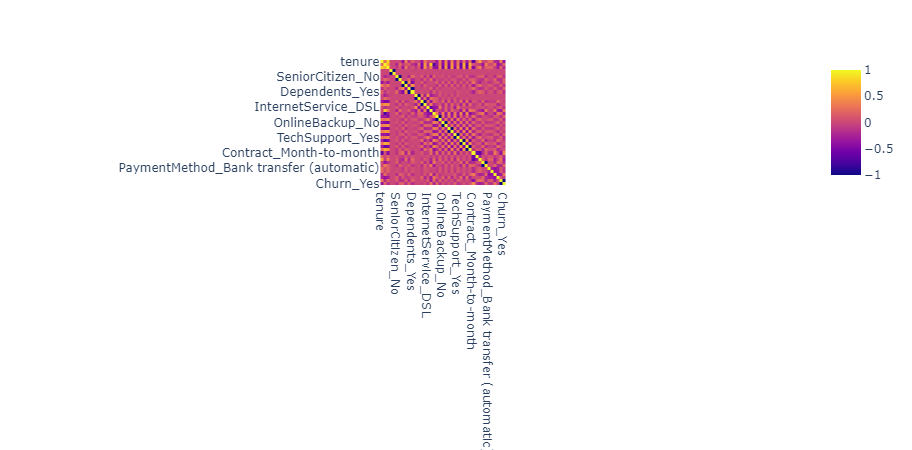

In [55]:
fig = px.imshow(correlation_matrix , text_auto=True)
fig.show()

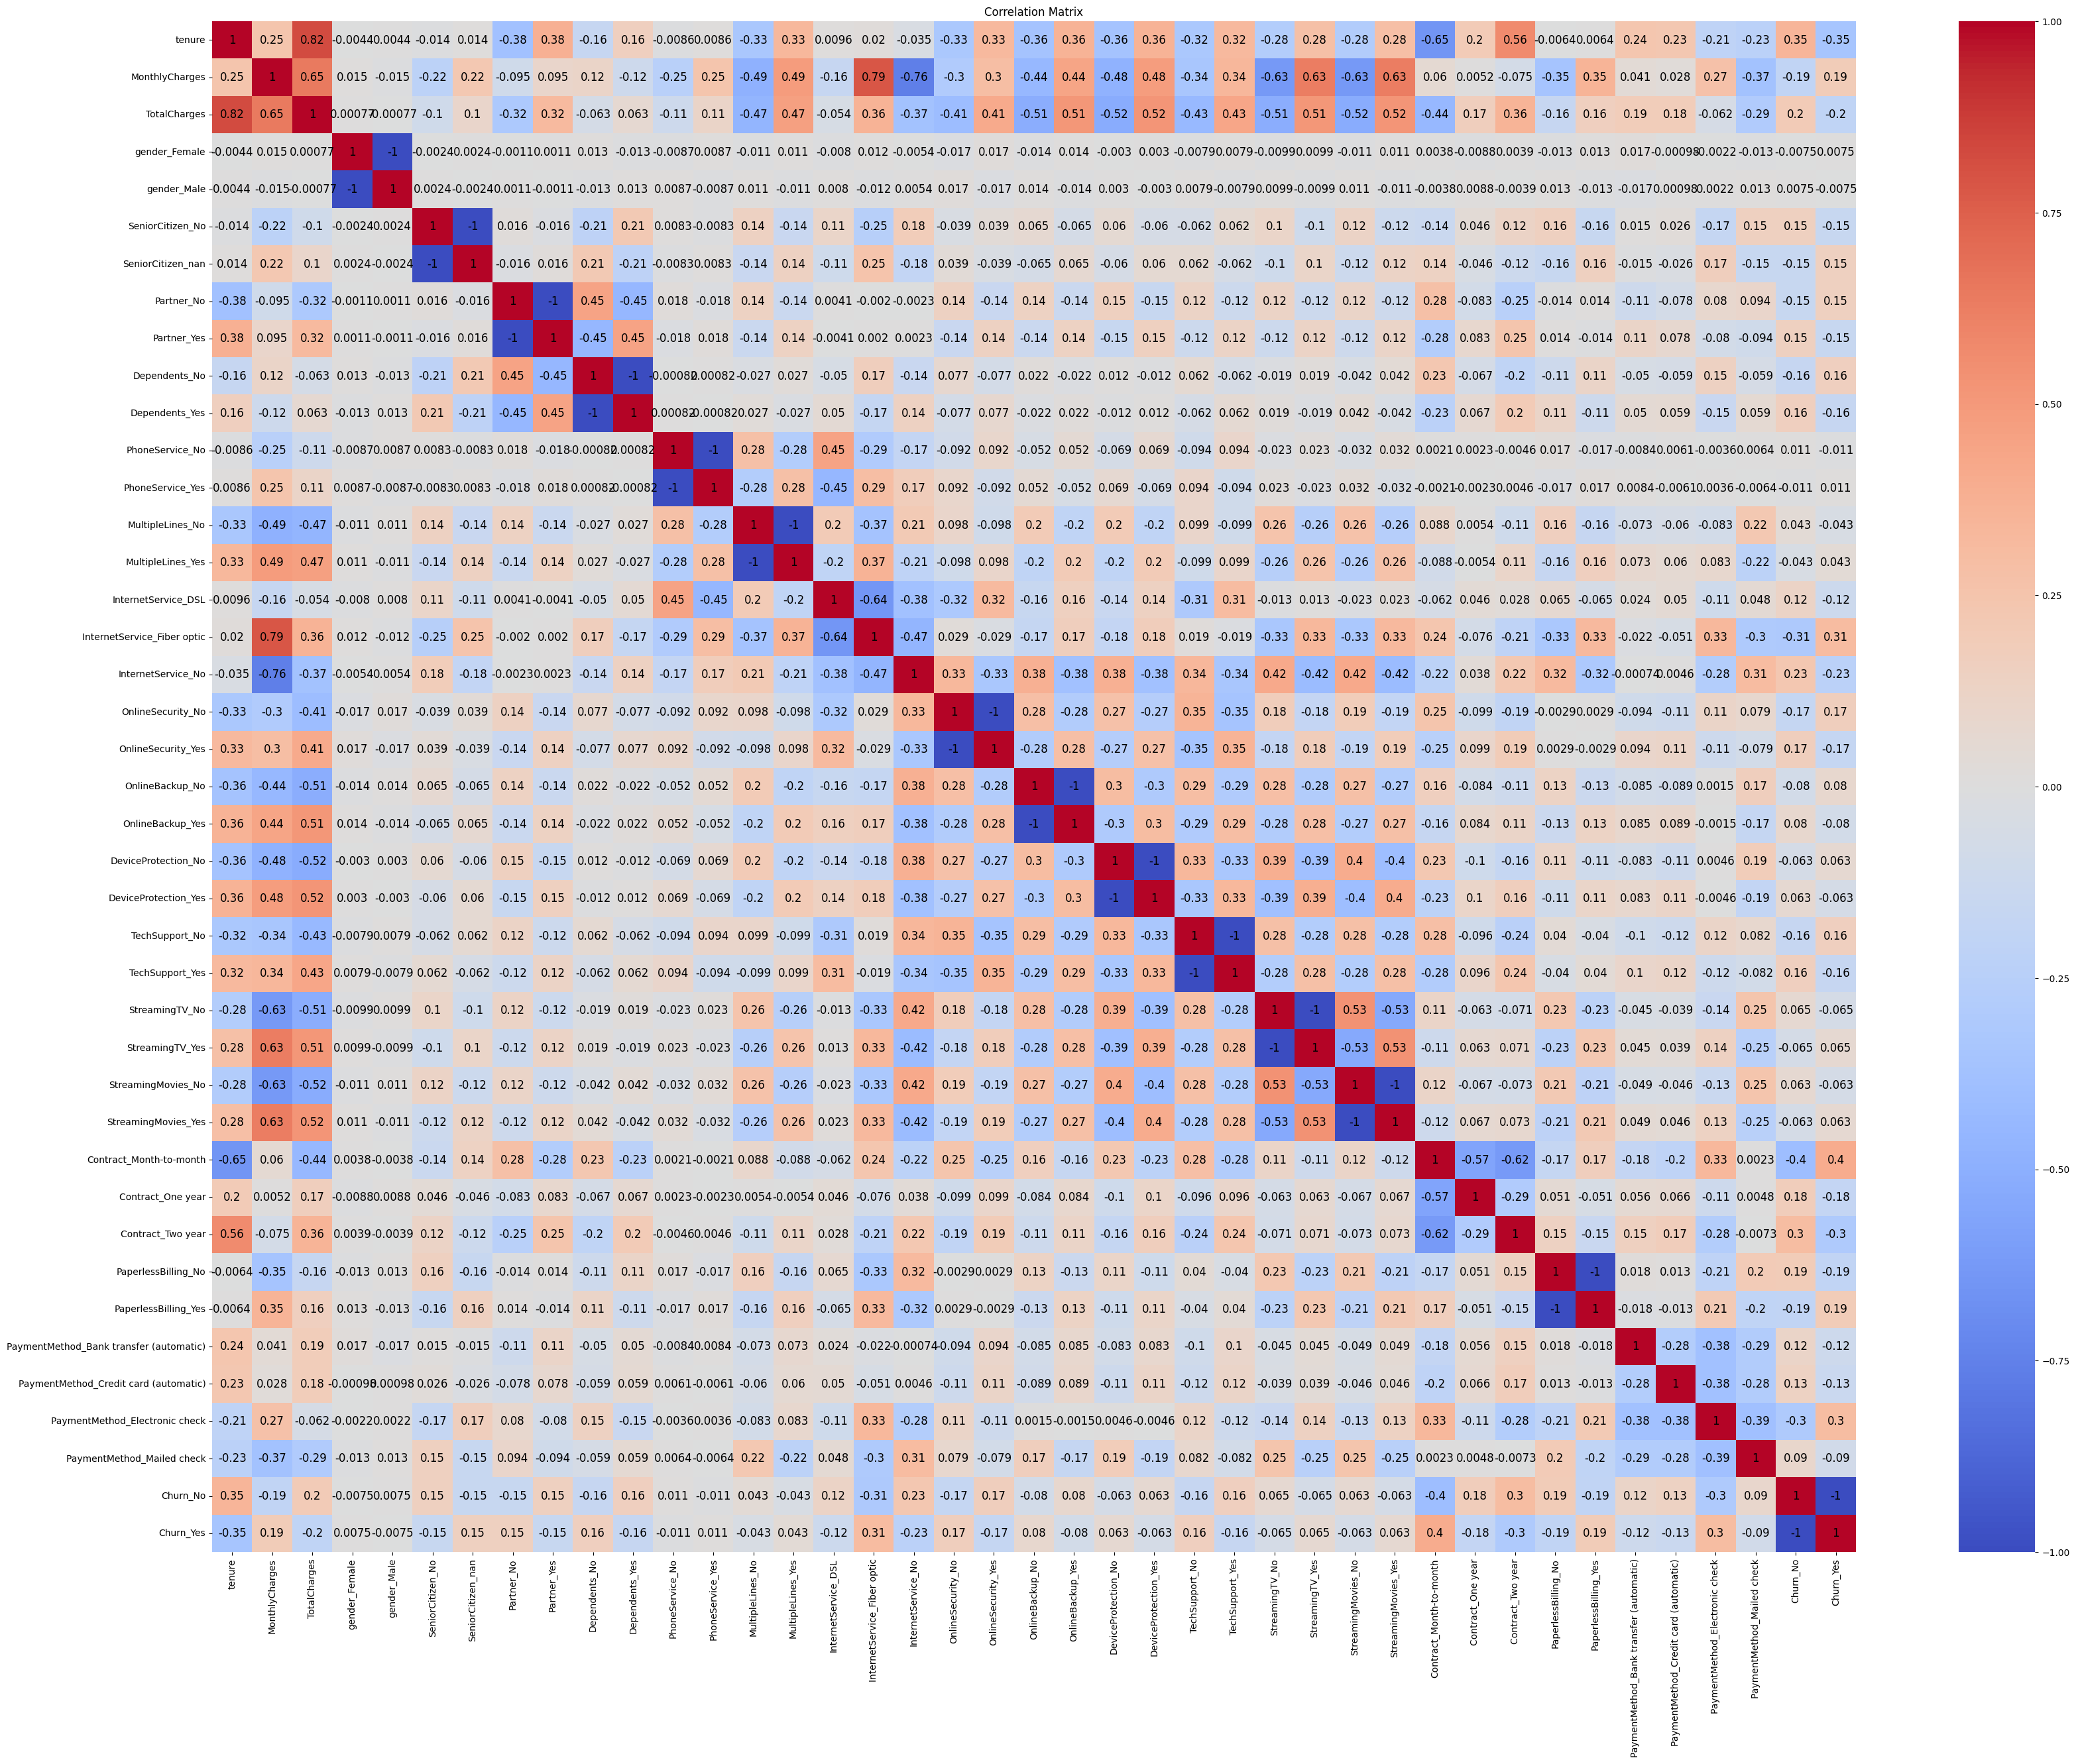

In [56]:
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 12, "color": "black"})
plt.title('Correlation Matrix')
plt.show()

In [57]:
df.drop('Churn_No', axis=1, inplace=True)


In [58]:
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)  

In [59]:
X=df.drop(columns=['Churn'])
Y=df.Churn

In [60]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


# Machine Learning Models 

In [61]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

# Plotting ML Models Comparsion 

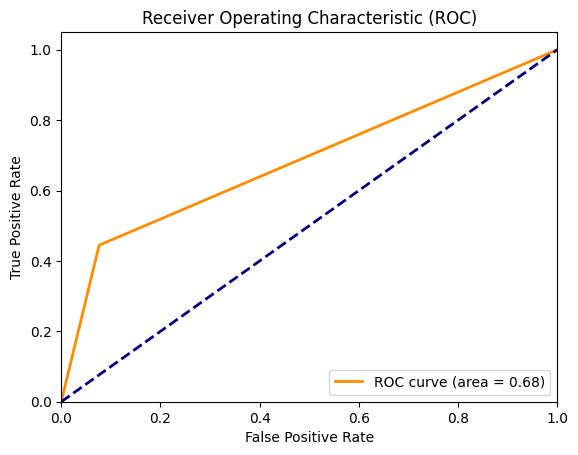

Model: Random Forest
Test Accuracy: 0.799
Precision: 0.672
Recall: 0.444
ROC AUC Score: 0.684
Confusion Matrix:
 [[969  80]
 [205 164]]



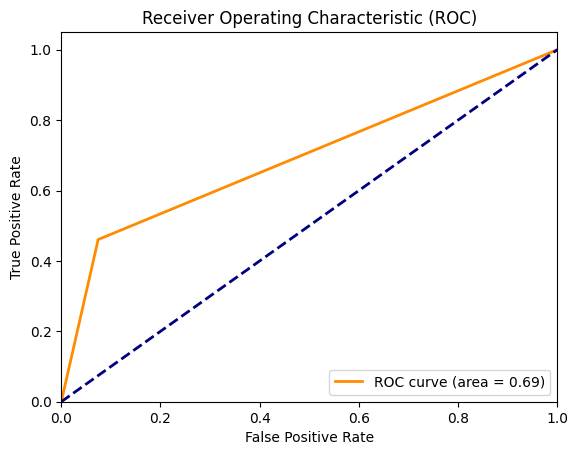

Model: Gradient Boosting
Test Accuracy: 0.805
Precision: 0.685
Recall: 0.461
ROC AUC Score: 0.693
Confusion Matrix:
 [[971  78]
 [199 170]]



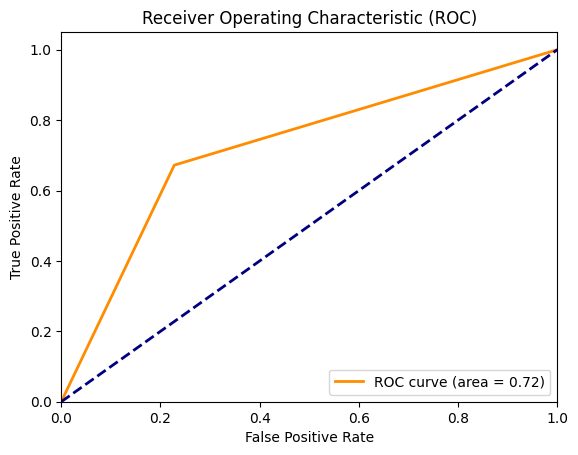

Model: Support Vector Machine
Test Accuracy: 0.746
Precision: 0.509
Recall: 0.672
ROC AUC Score: 0.722
Confusion Matrix:
 [[810 239]
 [121 248]]



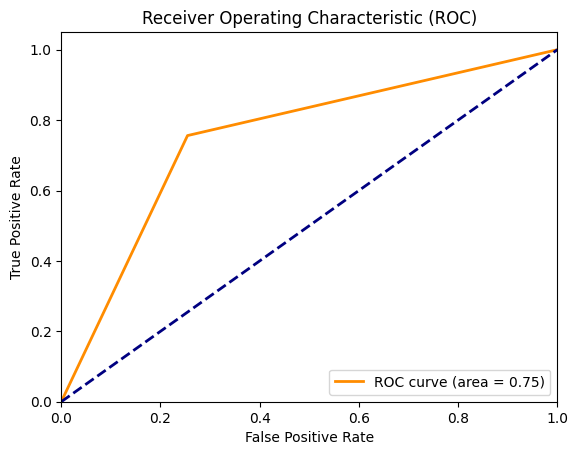

Model: Logistic Regression
Test Accuracy: 0.748
Precision: 0.511
Recall: 0.756
ROC AUC Score: 0.751
Confusion Matrix:
 [[782 267]
 [ 90 279]]



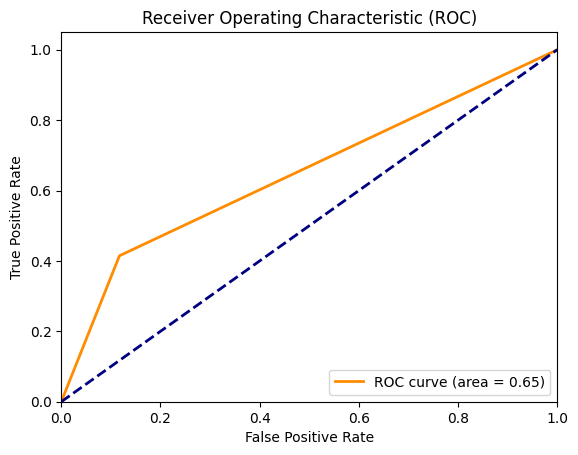

Model: Decision Tree
Test Accuracy: 0.761
Precision: 0.554
Recall: 0.415
ROC AUC Score: 0.649
Confusion Matrix:
 [[926 123]
 [216 153]]



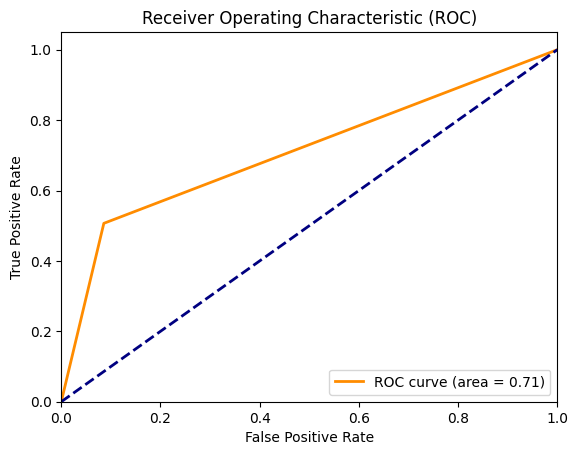

Model: Ada Boost
Test Accuracy: 0.808
Precision: 0.675
Recall: 0.507
ROC AUC Score: 0.71
Confusion Matrix:
 [[959  90]
 [182 187]]



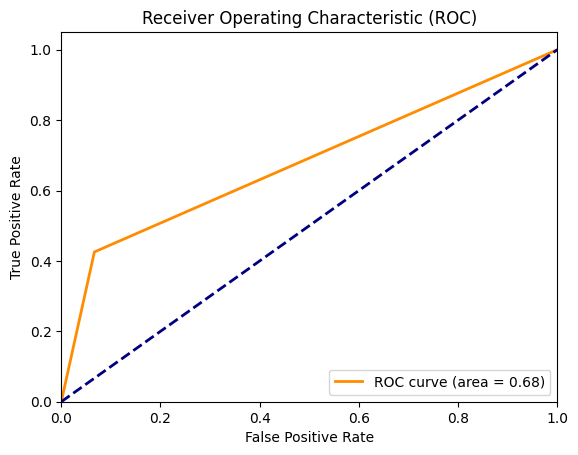

Model: XG Boost
Test Accuracy: 0.801
Precision: 0.692
Recall: 0.425
ROC AUC Score: 0.679
Confusion Matrix:
 [[979  70]
 [212 157]]



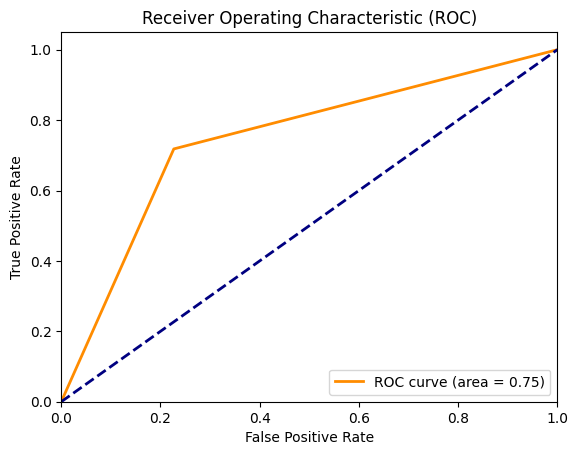

Model: Naive Bayes
Test Accuracy: 0.759
Precision: 0.527
Recall: 0.718
ROC AUC Score: 0.746
Confusion Matrix:
 [[811 238]
 [104 265]]

Best Model:
Test Accuracy: 0.8081805359661495
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 AdaBoostClassifier(learning_rate=0.5, random_state=42))]) with accuracy 0.81


In [64]:
best_model = None
best_accuracy = 0.0
model_evaluations = []

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Append model name and evaluation metrics to the list
    model_evaluations.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC_AUC': roc_auc,
        'Confusion_Matrix': confusion
    })

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3))
    print("Precision:", precision.round(3))
    print("Recall:", recall.round(3))
    print("ROC AUC Score:", roc_auc.round(3))
    print("Confusion Matrix:\n", confusion)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Convert the list of evaluations to a DataFrame
evaluations_df = pd.DataFrame(model_evaluations)

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2))


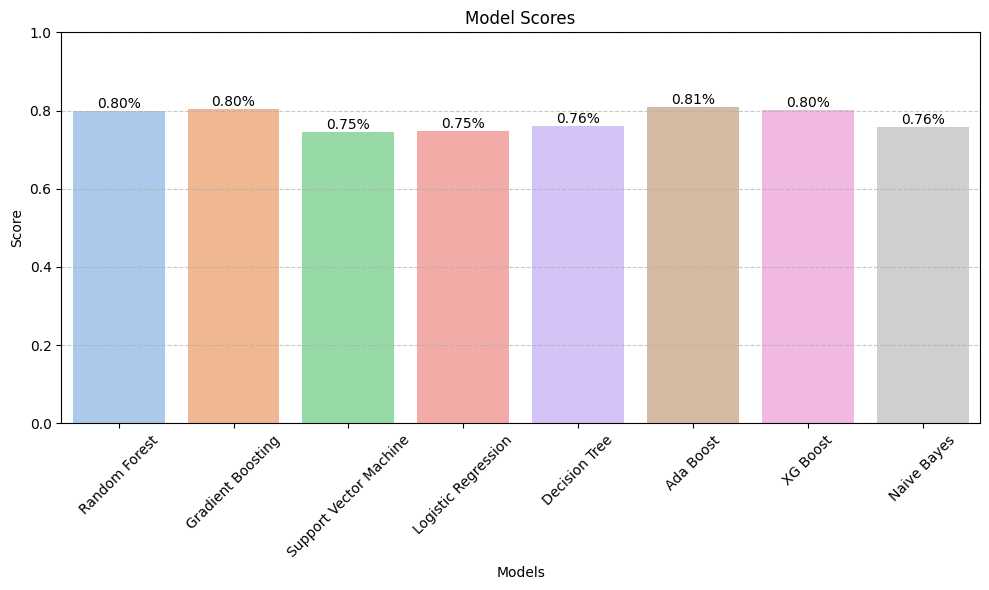

In [65]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(evaluations_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=evaluations_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show() 


# Buliding NN By Tensorflow 

In [66]:
model=Sequential(
    [
        tf.keras.Input(shape=(39,)),
        Dense(10 , activation='relu' , name = 'layer1') , 
        Dense(10 , activation='relu' , name = 'layer2') ,
        Dense(10 , activation='relu' , name = 'layer3') , 
        Dense(1 , activation='sigmoid' , name = 'layer4') 
    ]
) 


In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 10)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 631 (2.46 KB)

 Trainable params: 631 (2.46 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

In [69]:
X_train.fillna(0, inplace=True)  # Replace NaN values with 0
X_test.fillna(0, inplace=True)  # Replace NaN values with 0

# Convert DataFrame to integer type
x_train = X_train.astype(int)
y_train = y_train.astype(int)


In [70]:
x_train 

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
771        5              88           454              1            0   
5343      70              25          1715              0            1   
6819      38              94          3616              0            1   
1971      58             102          5885              1            0   
343       63              20          1328              0            1   
...      ...             ...           ...            ...          ...   
6937       4              74           265              0            1   
4256      31              79          2404              1            0   
1887      38              69          2657              0            1   
4491      38              68          2656              1            0   
3114      26              38          1025              1            0   

      SeniorCitizen_No  SeniorCitizen_nan  Partner_No  Partner_Yes  \
771                  1                  0           0            1   
5343                 1                  0           0            1   
6819                 1                  0           0            1   
1971                 1                  0           0            1   
343                  1                  0           1            0   
...                ...                ...         ...          ...   
6937                 1                  0           1            0   
4256                 1                  0           1            0   
1887                 1                  0           1            0   
4491                 1                  0           1            0   
3114                 1                  0           0            1   

      Dependents_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
771               1  ...                    1                        1   
5343              0  ...                    0                        0   
6819              0  ...                    0                        0   
1971              1  ...                    1                        1   
343               1  ...                    0                        0   
...             ...  ...                  ...                      ...   
6937              1  ...                    0                        1   
4256              1  ...                    0                        1   
1887              1  ...                    0                        1   
4491              1  ...                    1                        1   
3114              0  ...                    0                        1   

      Contract_One year  Contract_Two year  PaperlessBilling_No  \
771                   0                  0                    0   
5343                  0                  1                    1   
6819                  0                  1                    0   
1971                  0                  0                    0   
343                   1                  0                    1   
...                 ...                ...                  ...   
6937                  0                  0                    0   
4256                  0                  0                    0   
1887                  0                  0                    1   
4491                  0                  0                    1   
3114                  0                  0                    1   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
771                      1                                        0   
5343                     0                                        0   
6819                     1                                        1   
1971                     1                                        0   
343                      0                                        0   
...                    ...                                      ...   
6937                     1                                        0   
4256          

In [71]:
history=model.fit(x_train,y_train,epochs=10) 

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6552 - loss: 12.2165
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.5094
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7828 - loss: 0.4729
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7782 - loss: 0.4799
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7844 - loss: 0.4858
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.4685
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.4848
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7793 - loss: 0.4954
Epoch 9/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - loss: 0.4886
Epoch 10/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7780 - loss: 0.4999


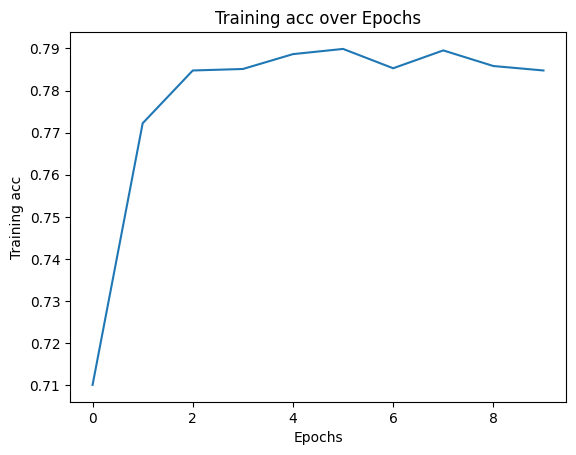

In [72]:
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Training acc over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training acc')
plt.show() 

In [73]:
train_score1=history.history['accuracy'][-1] 
print("Neural Network Classifier 1 (test score) : ",train_score1)

Neural Network Classifier 1 (test score) :  0.7847565412521362


In [74]:
test_loss , accuracy1 = model.evaluate(X_test.astype(int),y_test.astype(int)) 

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7751 - loss: 0.5333


In [75]:
print("Neural Network Classifier 1 (test score) : ", accuracy1)

Neural Network Classifier 1 (test score) :  0.7715091705322266


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Classifier (confusion matrix) :

[[1049    0]
 [ 369    0]]

Recall : 0.0
Precision : 0.0
F1 Score 0.0



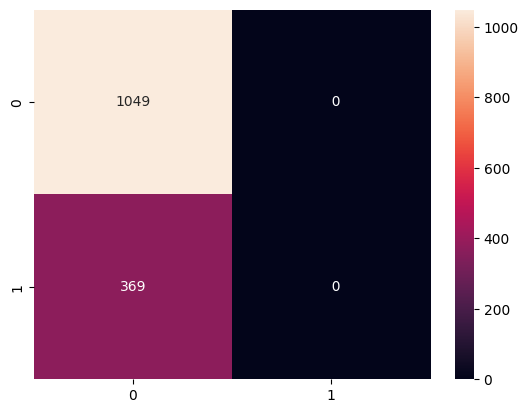

In [76]:
y_pred=model.predict(X_test.astype(int))
cm=confusion_matrix(y_test.astype(int),y_pred.astype(int).round())
print("Neural Network Classifier (confusion matrix) :\n")
print(cm)
print(f"\nRecall : {recall_score(y_test.astype(int),y_pred.astype(int).round())}")
print(f"Precision : {precision_score(y_test.astype(int),y_pred.astype(int).round())}")
print(f"F1 Score {f1_score(y_test.astype(int),y_pred.astype(int).round())}\n")

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

# Bulding NN By Pytorch 

In [77]:

# Convert DataFrame to NumPy array and then to tensor
x_train = torch.FloatTensor(X_train.values)
x_test = torch.FloatTensor(X_test.values)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)


In [78]:
y_train=y_train.unsqueeze(dim=1)
y_test=y_test.unsqueeze(dim=1) 

In [79]:
def param_count(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    print('Total number of parameters : ', sum(params)) 

In [80]:
# Neural Network Model (Pytorch)
class BasicNN(nn.Module) : 
    def __init__(self,input_shape,hidden_units,output) : 
        super().__init__() 
        self.layer1=nn.Linear(input_shape,hidden_units)
        self.layer2=nn.Linear(hidden_units,hidden_units)
        self.out=nn.Linear(hidden_units,output)
        
    def forward(self,x) : 
        x=F.relu(self.layer1(x))
        x=F.relu(self.layer2(x))
        x=F.sigmoid(self.out(x))
        
        return x  

In [81]:
torch.manual_seed(41)
model=BasicNN(input_shape=39,hidden_units=10,output=1) 

In [82]:
model.parameters 

<bound method Module.parameters of BasicNN(
  (layer1): Linear(in_features=39, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)>

In [83]:
param_count(model) 

Total number of parameters :  521


In [84]:
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

layer1.weight 	 torch.Size([10, 39])
layer1.bias 	 torch.Size([10])
layer2.weight 	 torch.Size([10, 10])
layer2.bias 	 torch.Size([10])
out.weight 	 torch.Size([1, 10])
out.bias 	 torch.Size([1])


In [85]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(), lr=0.01) 

In [86]:
epochs=100
losses=[]
for i in tqdm(range(epochs)) : 
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0 : 
        print(f"Epoch : {i} , loss : {loss}")
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad() 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch : 0 , loss : 3.5325686931610107
Epoch : 10 , loss : 1.496311902999878
Epoch : 20 , loss : 0.6690420508384705
Epoch : 30 , loss : 0.54462730884552
Epoch : 40 , loss : 0.5524977445602417
Epoch : 50 , loss : 0.5037955641746521
Epoch : 60 , loss : 0.4880780577659607
Epoch : 70 , loss : 0.4753318130970001
Epoch : 80 , loss : 0.46535494923591614
Epoch : 90 , loss : 0.45611947774887085


In [87]:
print(f"The total loss in training data is : {losses[-1]}")

The total loss in training data is : 0.4495246112346649


Text(0.5, 0, 'epochs')

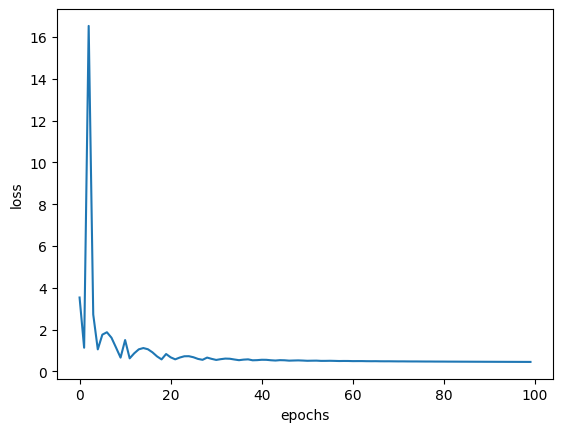

In [88]:
plt.plot(range(epochs) , losses)
plt.ylabel('loss')
plt.xlabel('epochs') 

In [89]:
with torch.no_grad() : 
    y_pred = model.forward(x_test)
    test_loss=criterion(y_pred, y_test)

In [90]:
print(f"The loss in the testing data is : {test_loss}")

The loss in the testing data is : 0.4534691274166107


In [91]:
y_train_pred=[]
with torch.no_grad() : 
    for i , data in tqdm(enumerate(x_train)) : 
        y_pred=model.forward(data)
        y_pred=torch.round(y_pred)
        y_train_pred.append(y_pred.detach().numpy())

0it [00:00, ?it/s]

In [92]:
y_test_pred=[]
with torch.no_grad() : 
    for i , data in tqdm(enumerate(x_test)) : 
        y_pred=model.forward(data)
        y_pred=torch.round(y_pred)
        y_test_pred.append(y_pred.detach().numpy()) 

0it [00:00, ?it/s]

In [93]:
train_score6=accuracy_score(y_train,y_train_pred)
print("Neural Network Classifier 2 (test score) : ",train_score6)

Neural Network Classifier 2 (test score) :  0.7872265349329569


In [94]:
accuracy6=accuracy_score(y_test,y_test_pred)
print("Neural Network Classifier 2 (test score) : ", accuracy6)

Neural Network Classifier 2 (test score) :  0.7898448519040903


Neural Network Classifier (confusion matrix) :

[[1003   46]
 [ 252  117]]

Recall : 0.3170731707317073
Precision : 0.7177914110429447
F1 Score 0.4398496240601504



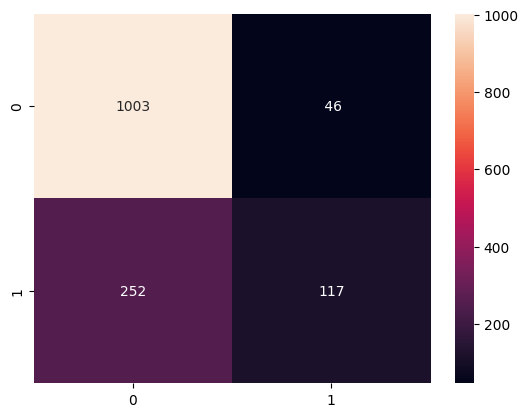

In [95]:
cm=confusion_matrix(y_test,y_test_pred)
print("Neural Network Classifier (confusion matrix) :\n")
print(cm)
print(f"\nRecall : {recall_score(y_test,y_test_pred)}")
print(f"Precision : {precision_score(y_test,y_test_pred)}")
print(f"F1 Score {f1_score(y_test,y_test_pred)}\n")

sns.heatmap(cm, annot=True,fmt='3g')
plt.show() 